In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms.bipartite import color

In [16]:
dataset = pd.read_csv('D:/Artificial Neural Networks/Self-Organizing Map (SOM)/Data/Credit_Card_Applications.csv')

In [17]:
dataset.tail(20)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
670,15672357,0,37.75,5.500,2,11,4,0.125,1,0,0,1,2,228,1,1
671,15711759,1,22.67,2.540,1,8,8,2.585,1,0,0,0,2,0,1,1
672,15615296,0,17.92,10.210,2,1,1,0.000,0,0,0,0,2,0,51,0
673,15699294,1,24.42,12.335,2,11,8,1.585,1,0,0,1,2,120,1,1
674,15788634,0,25.75,0.500,2,8,8,0.875,1,0,0,1,2,491,1,1
675,15660871,1,26.17,12.500,1,4,8,1.250,0,0,0,1,2,0,18,0
676,15618258,0,22.75,6.165,2,6,4,0.165,0,0,0,0,2,220,1001,0
677,15722535,1,23.00,0.750,2,7,4,0.500,1,0,0,1,1,320,1,0
678,15711977,1,25.67,0.290,1,8,4,1.500,0,0,0,1,2,160,1,0
679,15690169,1,48.58,0.205,1,4,4,0.250,1,1,11,0,2,380,2733,1


In [18]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [19]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [21]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!pip install minisom


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from minisom import MiniSom
# สร้าง SOM และปรับพารามิเตอร์เพื่อเพิ่มการตรวจจับ Outliers
som = MiniSom(x=30, y=15, input_len=15, sigma=3.5, learning_rate=0.02)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=3000)


#find winner

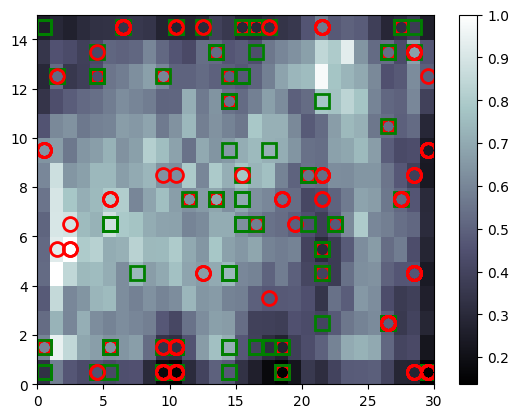

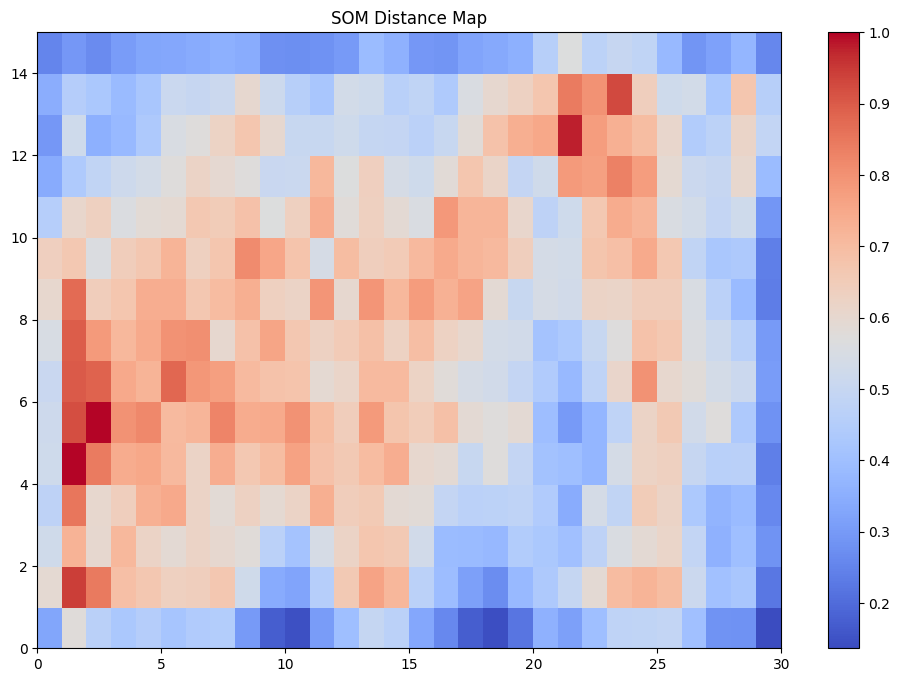

In [24]:
from pylab import bone, pcolor, colorbar, plot, show

# Visualizing the SOM
bone()
pcolor(som.distance_map().T)
colorbar()

# Define markers and colors
markers = ['o', 's']
colors = ['r', 'g']

# Loop through each input data point
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)

show()

# แสดงผลแผนที่ระยะห่าง (U-Matrix)
plt.figure(figsize=(12, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # ใช้สี coolwarm เพื่อเน้นเซลล์สีขาว
plt.colorbar()
plt.title('SOM Distance Map')
plt.show()

In [25]:
mappings = som.win_map(X)

# ตรวจสอบว่ามีข้อมูลในตำแหน่ง (0, 4) หรือไม่
if (0, 4) in mappings and len(mappings[(0, 4)]) > 0:
    # รวมข้อมูลในตำแหน่ง (0, 4)
    frauds = np.concatenate(mappings[(0, 4)], axis=0)  # ใช้ axis=0 หรือไม่ระบุ axis

    # ปรับให้ข้อมูลเป็นรูปแบบ 2D
    frauds = frauds.reshape(-1, X.shape[1])

    # แปลงข้อมูลกลับสู่ขนาดต้นฉบับ
    frauds = sc.inverse_transform(frauds)
    print(frauds)
else:
    print("ไม่มีข้อมูลในตำแหน่ง (0, 4) บนแผนที่ SOM")



ไม่มีข้อมูลในตำแหน่ง (0, 4) บนแผนที่ SOM


In [26]:
# สร้าง mappings ของแต่ละเซลล์ใน SOM
mappings = som.win_map(X)
outliers = []

# ตรวจจับ Outliers โดยหาค่าที่มีจำนวนข้อมูลเพียง 1 ค่าในเซลล์นั้น
for coord, values in mappings.items():
    if len(values) == 1:  # เซลล์ที่มีค่าเดียวถือว่าเป็น Outlier
        outliers.append(values[0])

# แปลง outliers จาก numpy array กลับเป็น DataFrame เพื่อตรวจสอบ CustomerID
outlier_indices = [i for i, x in enumerate(X) if any(np.all(x == outlier) for outlier in outliers)]  # Remove axis=1
outlier_ids = dataset.iloc[outlier_indices, 0].values  # ดึง CustomerID จาก index ที่เป็น outliers

# แสดงผล CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข
print("CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข:")
print(outlier_ids)

# สรุปจำนวน Outliers
num_outliers = len(outlier_ids)
print(f"จำนวน CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไขทั้งหมด: {num_outliers} คน")


CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข:
[15590434 15761158 15577515 15591010 15664615 15768474 15605872 15671293
 15636626 15636562 15593694 15785705 15793896 15654760 15594651]
จำนวน CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไขทั้งหมด: 15 คน


In [27]:
# คำนวณค่า U-Matrix (ระยะห่างระหว่างโหนด)
u_matrix = som.distance_map()

# ปรับค่า threshold ให้ต่ำลง
threshold = 0.25  # ลด threshold เพื่อตรวจจับเซลล์ที่มีระยะห่างมากขึ้น
white_cells_customer_ids = []

for coord, values in mappings.items():
    if u_matrix[coord] >= threshold:  # ตรวจสอบระยะห่างจาก U-Matrix
        for value in values:
            customer_idx = np.where(np.all(X == value, axis=1))[0]
            white_cells_customer_ids.extend(dataset.iloc[customer_idx, 0].values)

# แสดงผล CustomerIDs ที่อยู่ในเซลล์สีขาว (Outliers)
print("CustomerIDs ที่อยู่ในเซลล์สีขาว (Outliers):")

# จัดรูปแบบการแสดงผล CustomerIDs โดยแสดงเป็นแถวละ 15 ค่า
for i in range(0, len(white_cells_customer_ids), 15):
    print(white_cells_customer_ids[i:i+15])

# สรุปจำนวน CustomerIDs ที่อยู่ในเซลล์สีขาว
print(f"จำนวน CustomerIDs ที่อยู่ในเซลล์สีขาวทั้งหมด: {len(white_cells_customer_ids)} คน")


CustomerIDs ที่อยู่ในเซลล์สีขาว (Outliers):
[15662854, 15610042, 15568162, 15745375, 15638983, 15654625, 15662152, 15623210, 15734578, 15570508, 15795527, 15641733, 15660144, 15603565, 15802869]
[15664720, 15627328, 15645820, 15800554, 15617991, 15696120, 15750545, 15567919, 15687634, 15638751, 15641007, 15665014, 15606554, 15687688, 15638610]
[15789611, 15668679, 15738487, 15649160, 15773421, 15682686, 15781875, 15621244, 15636521, 15632789, 15761554, 15707602, 15815095, 15720725, 15567834]
[15591035, 15672912, 15694677, 15598614, 15608804, 15631267, 15611189, 15759387, 15712483, 15572361, 15698522, 15715750, 15789201, 15723884, 15735837]
[15778290, 15751137, 15704315, 15800049, 15801817, 15796787, 15725002, 15707681, 15701738, 15690169, 15571121, 15660390, 15682576, 15642391, 15598802]
[15705343, 15657778, 15652658, 15635244, 15688264, 15648876, 15679394, 15746258, 15644878, 15671987, 15581700, 15629133, 15604963, 15726466, 15692408]
[15694530, 15667451, 15763108, 15704509, 15730287,

In [28]:
import matplotlib.pyplot as plt
# ตรวจสอบตำแหน่งที่มีข้อมูลใน SOM
mappings = som.win_map(X)

# ตรวจสอบว่าข้อมูลในเซลล์ใดมีลักษณะผิดปกติ
for position, values in mappings.items():
    if len(values) == 1:  # ถ้าเซลล์นี้มีข้อมูลเพียงค่าเดียว (ถือว่าเป็น outlier)
        print(f"ตำแหน่ง {position}")
        print(f"มีข้อมูลผิดปกติ: {values}")


ตำแหน่ง (7, 4)
มีข้อมูลผิดปกติ: [array([0.0989873 , 0.        , 0.16917293, 0.03125   , 0.5       ,
       1.        , 0.875     , 0.03649123, 1.        , 0.        ,
       0.        , 1.        , 0.5       , 0.08      , 0.0586    ])]
ตำแหน่ง (2, 6)
มีข้อมูลผิดปกติ: [array([7.82624365e-01, 0.00000000e+00, 4.13533835e-02, 4.46428571e-02,
       5.00000000e-01, 7.69230769e-01, 3.75000000e-01, 8.77192982e-03,
       0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 0.00000000e+00,
       5.00000000e-01, 5.40000000e-02, 9.80000000e-04])]
ตำแหน่ง (28, 14)
มีข้อมูลผิดปกติ: [array([0.04725522, 0.        , 0.82586466, 0.53571429, 0.5       ,
       0.69230769, 1.        , 0.        , 1.        , 1.        ,
       0.20895522, 0.        , 0.5       , 0.        , 0.03376   ])]
ตำแหน่ง (1, 5)
มีข้อมูลผิดปกติ: [array([0.1012938 , 1.        , 0.5124812 , 0.14875   , 0.5       ,
       1.        , 0.5       , 0.00298246, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.26      , 0